# 1. Download files. 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import netCDF4 as nc
from scipy.stats import linregress, pearsonr

# 1. a.  

In [2]:
# Specify the path to your NetCDF file
file_path = 'sst.nc'

# Open the NetCDF file using Xarray
ds_1 = xr.open_dataset(file_path)

In [3]:
print(ds_1)

<xarray.Dataset> Size: 249MB
Dimensions:    (LONGITUDE: 360, LATITUDE: 180, TIME: 480, bnds: 2)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * LATITUDE   (LATITUDE) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * TIME       (TIME) datetime64[ns] 4kB 1981-01-16T12:00:00 ... 2020-12-16T1...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] 8kB ...
    SST1       (TIME, LATITUDE, LONGITUDE) float64 249MB ...
Attributes:
    history:      PyFerret V7.63 (optimized) 19-Jan-24
    Conventions:  CF-1.6


In [4]:
temp = ds_1['SST1']

# 1. b.  

In [5]:
file_path = 'sat.nc'

# Open the NetCDF file using Xarray
ds = xr.open_dataset(file_path)

In [6]:
print(ds)

<xarray.Dataset> Size: 35MB
Dimensions:    (LON: 192, LAT: 94, bnds: 2, TIME: 480)
Coordinates:
  * LON        (LON) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * LAT        (LAT) float32 376B -88.54 -86.65 -84.75 ... 84.75 86.65 88.54
  * TIME       (TIME) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2020-12-01
Dimensions without coordinates: bnds
Data variables:
    LAT_bnds   (LAT, bnds) float32 752B ...
    TIME_bnds  (TIME, bnds) datetime64[ns] 8kB ...
    AIR        (TIME, LAT, LON) float32 35MB ...
Attributes:
    history:      PyFerret V7.63 (optimized) 19-Jan-24
    Conventions:  CF-1.6


In [7]:
air_temperature = ds['AIR']

# 2. a. Monthly Climatology

#### SST

In [8]:
# January

indices = list(range(0, 480, 12)) # indices = list(range(1, 480, 12)) represents jan data

# Jan data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

jan_mc_1 = res*0.025
print(jan_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.67499998 -0.67499998 -0.62999998 ... -0.71999998 -0.71999998
  -0.53999999]
 [-0.44999999 -0.44999999 -0.40499999 ... -0.49499999 -0.49499999
  -0.49499999]
 [-0.26999999 -0.26999999 -0.26999999 ... -0.26999999 -0.26999999
  -0.26999999]]


In [9]:
# February

indices = list(range(1, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Feb data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

feb_mc_1 = res*0.025
print(feb_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.40499999 -0.26999999 -0.26999999 ... -0.22499999 -0.31499999
  -0.26999999]
 [-0.09       -0.09       -0.09       ... -0.09       -0.09
  -0.09      ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [10]:
# March

indices = list(range(2, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Mar data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

mar_mc_1 = res*0.025
print(mar_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.22499999 -0.22499999 -0.135      ... -0.18       -0.135
  -0.18      ]
 [-0.045      -0.045      -0.045      ...  0.         -0.045
  -0.045     ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [11]:
# April

indices = list(range(3, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Apr data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

apr_mc_1 = res*0.025
print(apr_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.67499998 -0.62999998 -0.62999998 ... -0.62999998 -0.62999998
  -0.67499998]
 [-0.18       -0.135      -0.135      ... -0.18       -0.22499999
  -0.18      ]
 [-0.045      -0.09       -0.09       ... -0.045      -0.045
  -0.045     ]]


In [12]:
# May

indices = list(range(4, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# may data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

may_mc_1 = res*0.025
print(may_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.94499997 -0.94499997 -0.94499997 ... -0.94499997 -0.89999998
  -0.89999998]
 [-0.35999999 -0.35999999 -0.35999999 ... -0.44999999 -0.40499999
  -0.35999999]
 [-0.40499999 -0.40499999 -0.35999999 ... -0.40499999 -0.40499999
  -0.40499999]]


In [13]:
# June

indices = list(range(5, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jun data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

jun_mc_1 = res*0.025
print(jun_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-1.16999997 -1.16999997 -1.07999997 ... -1.12499997 -1.03499997
  -0.98999997]
 [-0.98999997 -0.94499997 -0.85499998 ... -0.89999998 -0.94499997
  -0.94499997]
 [-0.31499999 -0.31499999 -0.31499999 ... -0.35999999 -0.35999999
  -0.35999999]]


In [14]:
# July

indices = list(range(6, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jul data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

jul_mc_1 = res*0.025
print(jul_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-1.70999995 -1.70999995 -1.70999995 ... -1.75499995 -1.70999995
  -1.70999995]
 [-1.70999995 -1.70999995 -1.70999995 ... -1.70999995 -1.66499996
  -1.70999995]
 [-0.98999997 -0.98999997 -0.98999997 ... -0.98999997 -0.98999997
  -0.98999997]]


In [15]:
# August

indices = list(range(7, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Aug data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

aug_mc_1 = res*0.025
print(aug_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-1.75499995 -1.75499995 -1.70999995 ... -1.79999995 -1.70999995
  -1.70999995]
 [-1.75499995 -1.75499995 -1.75499995 ... -1.75499995 -1.75499995
  -1.75499995]
 [-0.98999997 -0.98999997 -0.98999997 ... -0.98999997 -0.98999997
  -0.98999997]]


In [16]:
# September

indices = list(range(8, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Sep data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

sep_mc_1 = res*0.025
print(sep_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-1.79999995 -1.79999995 -1.79999995 ... -1.79999995 -1.79999995
  -1.79999995]
 [-1.75499995 -1.75499995 -1.75499995 ... -1.75499995 -1.75499995
  -1.75499995]
 [-1.07754148 -1.07999997 -1.07738279 ... -1.07737973 -1.07742551
  -1.07747739]]


In [17]:
# October

indices = list(range(9, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Oct data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

oct_mc_1 = res*0.025
print(oct_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-1.70999995 -1.70999995 -1.70999995 ... -1.70999995 -1.70999995
  -1.70999995]
 [-1.52999996 -1.48499996 -1.52999996 ... -1.61999996 -1.57499996
  -1.52999996]
 [-0.98999997 -0.98999997 -1.03499997 ... -0.98999997 -0.98999997
  -0.98999997]]


In [18]:
# November

indices = list(range(10, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Nov data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

nov_mc_1 = res*0.025
print(nov_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-1.39499996 -1.39499996 -1.39499996 ... -1.39499996 -1.34999996
  -1.34999996]
 [-1.21499997 -1.21499997 -1.21499997 ... -1.16999997 -1.16999997
  -1.16999997]
 [-0.62999998 -0.62999998 -0.62999998 ... -0.67499998 -0.67499998
  -0.67499998]]


In [19]:
# December

indices = list(range(11, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Dec data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0))
    res += ll

dec_mc_1 = res*0.025
print(dec_mc_1)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.85499998 -0.80999998 -0.76499998 ... -0.85499998 -0.89999998
  -0.85499998]
 [-0.53999999 -0.62999998 -0.53999999 ... -0.49499999 -0.62999998
  -0.62999998]
 [-0.40499999 -0.40499999 -0.40499999 ... -0.58499998 -0.49499999
  -0.49499999]]


#### SAT

In [20]:
# January

indices = list(range(0, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jan data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

jan_mc = res*0.025
print(jan_mc)

[[245.38074989 245.27524834 245.17049866 ... 245.70399857 245.59649849
  245.48824959]
 [246.98574867 246.73024788 246.47849846 ... 247.78124771 247.51349831
  247.24649849]
 [247.72524872 247.32624817 246.93699837 ... 248.99424858 248.55899963
  248.1362484 ]
 ...
 [247.11624756 247.2802494  247.43624878 ... 246.70999908 246.80399666
  246.96224785]
 [246.65824852 246.73824806 246.81924706 ... 246.45249748 246.5289978
  246.61024742]
 [246.07074738 246.18674927 246.17424889 ... 246.12224846 246.145998
  246.06024704]]


In [21]:
# February

indices = list(range(1, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Feb data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

feb_mc = res*0.025
print(feb_mc)

[[236.2234993  236.08399925 235.94399796 ... 236.64399796 236.50249863
  236.36224785]
 [237.92549858 237.57500038 237.23174896 ... 238.9877491  238.6317482
  238.27924881]
 [238.86474876 238.30824928 237.76299858 ... 240.59424973 240.01174774
  239.43449707]
 ...
 [247.02224884 247.1849968  247.34899979 ... 246.58624687 246.70274811
  246.86874771]
 [246.4549984  246.5625     246.6239975  ... 246.31874809 246.37674866
  246.45674782]
 [245.92774773 246.02449837 246.01024818 ... 245.97074776 245.98374786
  245.93124886]]


In [22]:
# March

indices = list(range(2, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Mar data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

mar_mc = res*0.025
print(mar_mc)

[[228.54774895 228.36899948 228.18924904 ... 229.08249855 228.9039978
  228.72674789]
 [230.51849899 230.08424759 229.6477478  ... 231.8227478  231.39049911
  230.95474854]
 [231.81199875 231.16699905 230.52949905 ... 233.81074867 233.13424797
  232.46699905]
 ...
 [246.05274811 246.22524872 246.40424919 ... 245.61924782 245.73049812
  245.89049873]
 [245.88899803 245.97424965 246.05499878 ... 245.78124809 245.80724869
  245.87449799]
 [245.67424698 245.77899857 245.78399963 ... 245.75124855 245.75649986
  245.68249817]]


In [23]:
# April

indices = list(range(3, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Apr data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

apr_mc = res*0.025
print(apr_mc)

[[225.25174828 225.07124786 224.8904995  ... 225.78374825 225.60824814
  225.4314991 ]
 [227.12349892 226.70524826 226.28674889 ... 228.39124908 227.96949844
  227.54599991]
 [228.14174728 227.49274826 226.85749779 ... 230.16749916 229.47774849
  228.80274734]
 ...
 [253.92724838 254.0287468  254.11399727 ... 253.63324738 253.73324509
  253.8372467 ]
 [253.69274902 253.75199661 253.77899857 ... 253.61624794 253.6349987
  253.68049583]
 [253.22274551 253.27449837 253.26824799 ... 253.26349831 253.2707489
  253.22999878]]


In [24]:
# May

indices = list(range(4, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# may data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

may_mc = res*0.025
print(may_mc)

[[224.22625198 224.05906715 223.89204903 ... 224.72707558 224.55992813
  224.39260559]
 [226.17443924 225.76375504 225.35505028 ... 227.42974129 227.0112545
  226.59282494]
 [227.49704475 226.88289261 226.28247795 ... 229.40595398 228.75684776
  228.12119865]
 ...
 [264.21962128 264.26837006 264.31560287 ... 264.06268921 264.12083588
  264.17871933]
 [264.15668335 264.16817398 264.18532867 ... 264.13410263 264.14616623
  264.15946808]
 [264.10825806 264.14276733 264.13950119 ... 264.12222595 264.12786789
  264.10709152]]


In [25]:
# June

indices = list(range(5, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jun data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

jun_mc = res*0.025
print(jun_mc)

[[223.90211334 223.73614426 223.57011032 ... 224.39460564 224.23222771
  224.06697655]
 [225.86934433 225.47618103 225.08812256 ... 227.06842957 226.66533203
  226.26553421]
 [227.07426224 226.49806938 225.93924789 ... 228.89995956 228.27415009
  227.66640396]
 ...
 [271.77344437 271.78507767 271.7923912  ... 271.73092957 271.74908981
  271.76323547]
 [271.82306366 271.83180847 271.83727722 ... 271.8103363  271.81831131
  271.82508316]
 [271.83557968 271.8446373  271.8419899  ... 271.83817215 271.84155655
  271.83762283]]


In [26]:
# July

indices = list(range(6, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jul data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

jul_mc = res*0.025
print(jul_mc)

[[223.21463394 223.05491295 222.89492607 ... 223.69232674 223.53271942
  223.3740818 ]
 [225.0678688  224.69720192 224.33062706 ... 226.19748726 225.81943092
  225.44145622]
 [225.89342117 225.36192627 224.85006104 ... 227.62228355 227.02440109
  226.44792023]
 ...
 [273.54689407 273.5479538  273.54129868 ... 273.54722748 273.54628525
  273.54566422]
 [273.5456604  273.55221329 273.55629425 ... 273.54683151 273.54789963
  273.54285583]
 [273.48938141 273.49822693 273.49953995 ... 273.49689026 273.49367065
  273.48505707]]


In [27]:
# August

indices = list(range(7, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Aug data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

aug_mc = res*0.025
print(aug_mc)

[[222.5051693  222.33424873 222.16083565 ... 223.02057076 222.84907227
  222.67862091]
 [224.30515823 223.91467972 223.53006363 ... 225.50026321 225.09929199
  224.69963493]
 [225.17707329 224.60625687 224.04924355 ... 227.00677719 226.37976074
  225.76992836]
 ...
 [271.54910126 271.62470703 271.66089554 ... 271.51423721 271.48964005
  271.53290863]
 [271.5928978  271.6604454  271.64893875 ... 271.5643158  271.57248993
  271.5800087 ]
 [271.49194946 271.50155869 271.52518997 ... 271.54831848 271.51280823
  271.44673767]]


In [28]:
# September

indices = list(range(8, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Sep data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

sep_mc = res*0.025
print(sep_mc)

[[222.55579185 222.38380203 222.20825272 ... 223.07541351 222.90363808
  222.72919312]
 [224.24133034 223.83274193 223.42705116 ... 225.48593559 225.06881447
  224.65319252]
 [225.14424553 224.53023262 223.93362656 ... 227.08091354 226.42249527
  225.77599831]
 ...
 [264.60388336 264.81821365 264.95908813 ... 264.33530426 264.4060112
  264.53177032]
 [264.73549423 264.81482239 264.87722855 ... 264.61196213 264.64566803
  264.6767189 ]
 [264.51958084 264.6934227  264.6859993  ... 264.708004   264.69168549
  264.54408951]]


In [29]:
# October

indices = list(range(9, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Oct data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

oct_mc = res*0.025
print(oct_mc)

[[228.24011307 228.08457527 227.9300518  ... 228.70242577 228.54938202
  228.39394875]
 [229.76320457 229.36701241 228.9757946  ... 230.96926117 230.56780167
  230.16536484]
 [230.71309242 230.11455536 229.52752647 ... 232.54969788 231.93076706
  231.31944809]
 ...
 [256.0595047  256.24041672 256.38744431 ... 255.65522842 255.77390213
  255.91799545]
 [256.08088303 256.16828423 256.21443672 ... 255.90454102 255.93810806
  255.99902573]
 [256.16329155 256.30614357 256.32249146 ... 256.29687843 256.27742004
  256.18337936]]


In [30]:
# November

indices = list(range(10, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Nov data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

nov_mc = res*0.025
print(nov_mc)

[[238.79466972 238.67967682 238.56663933 ... 239.14231758 239.0268158
  238.91083183]
 [240.24781342 239.9540741  239.6647625  ... 241.1414257  240.84137459
  240.54351578]
 [241.03430519 240.58396683 240.1430294  ... 242.4832058  241.98473473
  241.5011837 ]
 ...
 [250.39193649 250.56405373 250.70490761 ... 250.01713104 250.09820137
  250.24534416]
 [250.05053902 250.15029144 250.23390961 ... 249.86238785 249.93378487
  249.99141121]
 [249.77493629 249.92251511 249.93488274 ... 249.89231758 249.88231544
  249.79002876]]


In [31]:
# December

indices = list(range(11, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Dec data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]])
    res += ll

dec_mc = res*0.025
print(dec_mc)

[[246.2823204  246.188908   246.09724884 ... 246.56477547 246.47089882
  246.37626877]
 [247.78065071 247.55389786 247.33268318 ... 248.48285141 248.24482079
  248.01039734]
 [248.43748131 248.08318939 247.74291153 ... 249.55599823 249.17345695
  248.80219688]
 ...
 [248.29458008 248.46624413 248.59270592 ... 247.9268631  248.03285789
  248.17640266]
 [248.05673828 248.11016617 248.17662544 ... 247.90156479 247.97350273
  248.03156471]
 [247.75698853 247.88259125 247.86911545 ... 247.8409523  247.8446064
  247.76744156]]


# 2. b. Monthly Anomaly

#### SST

In [32]:
# January

indices = list(range(0, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jan data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(jan_mc_1, nan = 0)
    res += ll

jan_ma_1 = res*0.025
print(jan_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-18 ...  1.27675648e-16
   1.16573418e-16 -3.88578059e-17]
 [ 0.00000000e+00  0.00000000e+00 -3.33066907e-17 ...  6.93889390e-17
   6.93889390e-17  6.93889390e-17]
 [ 3.05311332e-17  3.05311332e-17  3.05311332e-17 ...  3.05311332e-17
   3.05311332e-17  3.05311332e-17]]


In [33]:
# February

indices = list(range(1, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Feb data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(feb_mc_1, nan = 0)
    res += ll

feb_ma_1 = res*0.025
print(feb_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.77555756e-17  2.77555756e-18  6.93889390e-17 ...  0.00000000e+00
  -2.22044605e-17 -2.77555756e-18]
 [-5.62050406e-17 -5.62050406e-17 -5.62050406e-17 ... -5.62050406e-17
  -5.62050406e-17 -5.62050406e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [34]:
# March

indices = list(range(2, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Mar data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(mar_mc_1, nan = 0)
    res += ll

mar_ma_1 = res*0.025
print(mar_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  4.57966998e-17 ...  3.19189120e-17
   6.80011603e-17  2.91433544e-17]
 [-1.70002901e-17 -1.70002901e-17 -1.70002901e-17 ...  0.00000000e+00
  -1.70002901e-17 -1.70002901e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [35]:
# April

indices = list(range(3, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Apr data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(apr_mc_1, nan = 0)
    res += ll

apr_ma_1 = res*0.025
print(apr_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.11022302e-17 -1.11022302e-17 ... -1.11022302e-17
  -1.11022302e-17  0.00000000e+00]
 [-5.55111512e-17  4.44089210e-17  4.44089210e-17 ...  2.15105711e-17
   0.00000000e+00 -5.55111512e-17]
 [-2.11636264e-17 -1.45716772e-17 -1.45716772e-17 ... -2.11636264e-17
  -2.11636264e-17 -2.11636264e-17]]


In [36]:
# May

indices = list(range(4, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# may data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(may_mc_1, nan = 0)
    res += ll

may_ma_1 = res*0.025
print(may_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.38777878e-16  1.38777878e-16  1.38777878e-16 ...  1.38777878e-16
   0.00000000e+00  0.00000000e+00]
 [ 6.66133815e-17  6.66133815e-17  6.66133815e-17 ...  0.00000000e+00
  -9.99200722e-17  6.66133815e-17]
 [-1.22124533e-16 -1.22124533e-16 -5.55111512e-17 ... -1.22124533e-16
  -1.22124533e-16 -1.22124533e-16]]


In [37]:
# June

indices = list(range(5, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jun data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(jun_mc_1, nan = 0)
    res += ll

jun_ma_1 = res*0.025
print(jun_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.22044605e-17 -2.22044605e-17  4.44089210e-17 ...  0.00000000e+00
   2.22044605e-17  6.10622664e-17]
 [ 2.77555756e-17  7.21644966e-17 -1.66533454e-17 ...  0.00000000e+00
   9.43689571e-17  9.43689571e-17]
 [ 3.33066907e-17  3.33066907e-17  3.33066907e-17 ... -3.60822483e-17
  -3.60822483e-17 -3.60822483e-17]]


In [38]:
# July

indices = list(range(6, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jul data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(jul_mc_1, nan = 0)
    res += ll

jul_ma_1 = res*0.025
print(jul_ma_1)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.8817842e-17 8.8817842e-17 8.8817842e-17 ... 4.4408921e-17
  8.8817842e-17 8.8817842e-17]
 [8.8817842e-17 8.8817842e-17 8.8817842e-17 ... 8.8817842e-17
  2.2759572e-16 8.8817842e-17]
 [2.2759572e-16 2.2759572e-16 2.2759572e-16 ... 2.2759572e-16
  2.2759572e-16 2.2759572e-16]]


In [39]:
# August

indices = list(range(7, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Aug data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(aug_mc_1, nan = 0)
    res += ll

aug_ma_1 = res*0.025
print(aug_ma_1)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [4.4408921e-17 4.4408921e-17 8.8817842e-17 ... 0.0000000e+00
  8.8817842e-17 8.8817842e-17]
 [4.4408921e-17 4.4408921e-17 4.4408921e-17 ... 4.4408921e-17
  4.4408921e-17 4.4408921e-17]
 [2.3869795e-16 2.3869795e-16 2.3869795e-16 ... 2.3869795e-16
  2.3869795e-16 2.3869795e-16]]


In [40]:
# September

indices = list(range(8, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Sep data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(sep_mc_1, nan = 0)
    res += ll

sep_ma_1 = res*0.025
print(sep_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.44089210e-17  4.44089210e-17  4.44089210e-17 ...  4.44089210e-17
   4.44089210e-17  4.44089210e-17]
 [-1.55431223e-16  2.83106871e-16 -2.83106871e-16 ...  0.00000000e+00
   0.00000000e+00  2.05391260e-16]]


In [41]:
# October

indices = list(range(9, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Oct data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(oct_mc_1, nan = 0)
    res += ll

oct_ma_1 = res*0.025
print(oct_ma_1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.88178420e-17  8.88178420e-17  8.88178420e-17 ...  8.88178420e-17
   8.88178420e-17  8.88178420e-17]
 [ 3.33066907e-17  8.88178420e-17  3.88578059e-17 ...  1.77635684e-16
   0.00000000e+00  3.33066907e-17]
 [ 2.27595720e-16  2.27595720e-16 -1.99840144e-16 ...  2.27595720e-16
   2.27595720e-16  2.27595720e-16]]


In [42]:
# November

indices = list(range(10, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Nov data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(nov_mc_1, nan = 0)
    res += ll

nov_ma_1 = res*0.025
print(nov_ma_1)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.77635684e-16 1.77635684e-16 1.77635684e-16 ... 1.77635684e-16
  0.00000000e+00 0.00000000e+00]
 [1.60982339e-16 1.60982339e-16 1.60982339e-16 ... 3.33066907e-17
  3.33066907e-17 3.33066907e-17]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [43]:
# December

indices = list(range(11, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Dec data
res = np.zeros((180, 360))
for i in range(len(indices)):
    ll = np.array(np.nan_to_num(temp[indices[i]], nan = 0)) - np.nan_to_num(dec_mc_1, nan = 0)
    res += ll

dec_ma_1 = res*0.025
dec_ma_1

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.66133815e-17, -1.11022302e-17,  0.00000000e+00, ...,
        -6.66133815e-17,  0.00000000e+00, -6.66133815e-17],
       [-3.33066907e-17, -3.88578059e-17, -3.33066907e-17, ...,
         5.55111512e-18, -3.88578059e-17, -3.88578059e-17],
       [-6.10622664e-17, -6.66133815e-17, -6.66133815e-17, ...,
        -9.99200722e-17,  9.71445147e-17,  7.49400542e-17]])

#### SAT

In [44]:
# January

indices = list(range(0, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jan data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - jan_mc
    res += ll

jan_ma = res*0.025
print(jan_ma)

[[-1.70530257e-14 -1.13686838e-14 -1.13686838e-14 ...  0.00000000e+00
   0.00000000e+00 -1.13686838e-14]
 [-5.68434189e-15 -5.68434189e-15  0.00000000e+00 ... -2.27373675e-14
   0.00000000e+00 -5.68434189e-15]
 [-5.68434189e-15  0.00000000e+00  0.00000000e+00 ... -1.70530257e-14
  -2.27373675e-14 -1.13686838e-14]
 ...
 [-5.68434189e-15 -1.13686838e-14  0.00000000e+00 ...  0.00000000e+00
  -2.27373675e-14  0.00000000e+00]
 [-2.27373675e-14 -1.70530257e-14 -1.13686838e-14 ...  0.00000000e+00
  -5.68434189e-15 -1.13686838e-14]
 [ 0.00000000e+00 -1.13686838e-14 -1.70530257e-14 ... -1.13686838e-14
   0.00000000e+00 -2.27373675e-14]]


In [45]:
# February

indices = list(range(1, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Feb data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - feb_mc
    res += ll

feb_ma = res*0.025
print(feb_ma)

[[ 0.00000000e+00 -2.27373675e-14 -2.27373675e-14 ... -1.13686838e-14
   0.00000000e+00 -5.68434189e-15]
 [-2.27373675e-14 -2.27373675e-14 -5.68434189e-15 ...  0.00000000e+00
   0.00000000e+00 -2.27373675e-14]
 [-1.13686838e-14 -1.13686838e-14  0.00000000e+00 ...  0.00000000e+00
  -5.68434189e-15 -1.70530257e-14]
 ...
 [-2.27373675e-14 -1.70530257e-14 -1.13686838e-14 ... -5.68434189e-15
  -1.13686838e-14  0.00000000e+00]
 [-5.68434189e-15  0.00000000e+00 -1.13686838e-14 ... -2.27373675e-14
  -2.27373675e-14 -1.13686838e-14]
 [ 0.00000000e+00 -5.68434189e-15  0.00000000e+00 ... -1.13686838e-14
  -5.68434189e-15 -1.70530257e-14]]


In [46]:
# March

indices = list(range(2, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Mar data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - mar_mc
    res += ll

mar_ma = res*0.025
print(mar_ma)

[[-5.68434189e-15  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -5.68434189e-15 -5.68434189e-15]
 [-2.27373675e-14  0.00000000e+00 -1.13686838e-14 ... -2.27373675e-14
   0.00000000e+00 -5.68434189e-15]
 [-5.68434189e-15 -1.70530257e-14  0.00000000e+00 ... -2.27373675e-14
  -1.70530257e-14  0.00000000e+00]
 ...
 [-5.68434189e-15 -5.68434189e-15  0.00000000e+00 ... -5.68434189e-15
  -1.13686838e-14 -2.27373675e-14]
 [ 0.00000000e+00 -1.13686838e-14 -5.68434189e-15 ...  0.00000000e+00
  -2.27373675e-14 -2.27373675e-14]
 [-1.70530257e-14 -1.70530257e-14 -1.70530257e-14 ... -1.70530257e-14
  -2.27373675e-14 -1.70530257e-14]]


In [47]:
# April

indices = list(range(3, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Apr data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - apr_mc
    res += ll

apr_ma = res*0.025
print(apr_ma)

[[-1.70530257e-14 -1.13686838e-14 -5.68434189e-15 ... -2.27373675e-14
  -5.68434189e-15 -2.27373675e-14]
 [ 0.00000000e+00 -5.68434189e-15  0.00000000e+00 ... -5.68434189e-15
  -1.13686838e-14 -5.68434189e-15]
 [-1.13686838e-14  0.00000000e+00 -2.27373675e-14 ... -2.27373675e-14
  -2.27373675e-14 -2.27373675e-14]
 ...
 [-5.68434189e-15 -1.70530257e-14 -1.13686838e-14 ...  0.00000000e+00
  -1.70530257e-14 -1.13686838e-14]
 [ 0.00000000e+00 -2.27373675e-14 -1.70530257e-14 ... -1.13686838e-14
  -5.68434189e-15 -2.27373675e-14]
 [-2.27373675e-14 -5.68434189e-15 -5.68434189e-15 ...  0.00000000e+00
  -1.13686838e-14 -1.70530257e-14]]


In [48]:
# May

indices = list(range(4, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# may data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - may_mc
    res += ll

may_ma = res*0.025
print(may_ma)

[[-5.68434189e-15 -5.68434189e-15 -1.70530257e-14 ...  0.00000000e+00
  -1.70530257e-14 -1.13686838e-14]
 [-1.13686838e-14 -1.70530257e-14 -1.70530257e-14 ... -5.68434189e-15
  -1.70530257e-14  0.00000000e+00]
 [-1.70530257e-14  0.00000000e+00 -2.27373675e-14 ... -2.27373675e-14
  -5.68434189e-15  0.00000000e+00]
 ...
 [-2.27373675e-14 -3.41060513e-14 -2.27373675e-14 ... -3.41060513e-14
  -2.27373675e-14 -1.13686838e-14]
 [-3.41060513e-14  1.13686838e-14  1.13686838e-14 ... -1.13686838e-14
  -3.41060513e-14 -3.41060513e-14]
 [-1.13686838e-14 -3.41060513e-14 -2.27373675e-14 ...  1.13686838e-14
   1.13686838e-14 -2.27373675e-14]]


In [49]:
# June

indices = list(range(5, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jun data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - jun_mc
    res += ll

jun_ma = res*0.025
print(jun_ma)

[[-5.68434189e-15 -1.70530257e-14  0.00000000e+00 ...  0.00000000e+00
  -5.68434189e-15  0.00000000e+00]
 [-2.27373675e-14  0.00000000e+00 -1.70530257e-14 ... -2.27373675e-14
  -1.70530257e-14 -1.13686838e-14]
 [-2.27373675e-14 -2.27373675e-14 -1.13686838e-14 ...  0.00000000e+00
  -1.70530257e-14 -1.70530257e-14]
 ...
 [ 1.13686838e-14 -2.27373675e-14 -3.41060513e-14 ...  1.13686838e-14
  -2.27373675e-14 -3.41060513e-14]
 [-1.13686838e-14 -3.41060513e-14 -1.13686838e-14 ...  1.13686838e-14
  -2.27373675e-14 -3.41060513e-14]
 [-1.13686838e-14 -3.41060513e-14 -3.41060513e-14 ...  1.13686838e-14
   0.00000000e+00  1.13686838e-14]]


In [50]:
# July

indices = list(range(6, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Jul data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - jul_mc
    res += ll

jul_ma = res*0.025
print(jul_ma)

[[ 0.00000000e+00 -5.68434189e-15  0.00000000e+00 ... -1.70530257e-14
  -1.13686838e-14 -1.70530257e-14]
 [-2.27373675e-14 -1.70530257e-14 -2.27373675e-14 ... -5.68434189e-15
  -2.27373675e-14 -5.68434189e-15]
 [ 0.00000000e+00 -1.70530257e-14 -2.27373675e-14 ... -2.27373675e-14
  -5.68434189e-15 -5.68434189e-15]
 ...
 [ 0.00000000e+00  1.13686838e-14 -1.13686838e-14 ... -2.27373675e-14
  -2.27373675e-14 -3.41060513e-14]
 [-3.41060513e-14 -2.27373675e-14 -1.13686838e-14 ... -3.41060513e-14
  -3.41060513e-14 -2.27373675e-14]
 [-2.27373675e-14 -1.13686838e-14 -2.27373675e-14 ...  1.13686838e-14
   1.13686838e-14  1.13686838e-14]]


In [51]:
# August

indices = list(range(7, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Aug data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - aug_mc
    res += ll

aug_ma = res*0.025
print(aug_ma)

[[-5.68434189e-15 -1.70530257e-14 -5.68434189e-15 ...  0.00000000e+00
  -1.13686838e-14 -2.27373675e-14]
 [-2.27373675e-14 -1.70530257e-14  0.00000000e+00 ...  0.00000000e+00
  -1.70530257e-14 -5.68434189e-15]
 [-1.13686838e-14 -5.68434189e-15 -2.27373675e-14 ... -5.68434189e-15
   0.00000000e+00 -5.68434189e-15]
 ...
 [-3.41060513e-14 -1.13686838e-14  1.13686838e-14 ... -1.13686838e-14
  -1.13686838e-14  1.13686838e-14]
 [-3.41060513e-14  1.13686838e-14 -2.27373675e-14 ...  0.00000000e+00
   1.13686838e-14  1.13686838e-14]
 [-3.41060513e-14 -3.41060513e-14 -2.27373675e-14 ... -2.27373675e-14
  -3.41060513e-14 -3.41060513e-14]]


In [52]:
# September

indices = list(range(8, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Sep data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - sep_mc
    res += ll

sep_ma = res*0.025
print(sep_ma)

[[ 0.00000000e+00 -2.27373675e-14 -1.13686838e-14 ... -1.13686838e-14
  -1.70530257e-14 -5.68434189e-15]
 [-1.70530257e-14 -1.70530257e-14 -2.27373675e-14 ... -5.68434189e-15
  -1.70530257e-14  0.00000000e+00]
 [-5.68434189e-15 -1.70530257e-14 -5.68434189e-15 ...  0.00000000e+00
  -5.68434189e-15 -1.70530257e-14]
 ...
 [-2.27373675e-14  1.13686838e-14 -1.13686838e-14 ...  0.00000000e+00
  -2.27373675e-14 -2.27373675e-14]
 [-2.27373675e-14  1.13686838e-14 -1.13686838e-14 ... -1.13686838e-14
   0.00000000e+00  1.13686838e-14]
 [ 0.00000000e+00 -3.41060513e-14 -3.41060513e-14 ...  0.00000000e+00
  -1.13686838e-14  1.13686838e-14]]


In [53]:
# October

indices = list(range(9, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Oct data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - oct_mc
    res += ll

oct_ma = res*0.025
print(oct_ma)

[[-1.13686838e-14 -2.27373675e-14  0.00000000e+00 ... -1.13686838e-14
  -1.13686838e-14 -1.70530257e-14]
 [ 0.00000000e+00 -5.68434189e-15 -1.13686838e-14 ...  0.00000000e+00
  -1.70530257e-14 -2.27373675e-14]
 [-2.27373675e-14  0.00000000e+00 -2.27373675e-14 ...  0.00000000e+00
   0.00000000e+00 -2.27373675e-14]
 ...
 [ 1.13686838e-14  1.13686838e-14 -1.13686838e-14 ... -1.13686838e-14
  -1.70530257e-14  0.00000000e+00]
 [ 0.00000000e+00 -1.13686838e-14  1.13686838e-14 ...  0.00000000e+00
  -2.27373675e-14 -5.68434189e-15]
 [-2.27373675e-14 -1.13686838e-14 -1.13686838e-14 ... -2.27373675e-14
   0.00000000e+00  1.13686838e-14]]


In [54]:
# November

indices = list(range(10, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Nov data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - nov_mc
    res += ll

nov_ma = res*0.025
print(nov_ma)

[[-2.27373675e-14 -1.13686838e-14 -5.68434189e-15 ... -1.13686838e-14
  -5.68434189e-15 -5.68434189e-15]
 [-1.70530257e-14 -1.70530257e-14  0.00000000e+00 ... -2.27373675e-14
  -1.70530257e-14 -2.27373675e-14]
 [-2.27373675e-14 -2.27373675e-14 -1.70530257e-14 ...  0.00000000e+00
  -1.70530257e-14 -1.70530257e-14]
 ...
 [-1.70530257e-14 -1.70530257e-14 -1.70530257e-14 ... -1.70530257e-14
  -2.27373675e-14  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.70530257e-14
  -5.68434189e-15  0.00000000e+00]
 [-2.27373675e-14 -1.70530257e-14 -2.27373675e-14 ... -1.13686838e-14
  -1.13686838e-14 -1.70530257e-14]]


In [55]:
# December

indices = list(range(11, 480, 12)) # indices = list(range(1, 480, 12)) represents feb data

# Dec data
res = np.zeros((94, 192))
for i in range(len(indices)):
    ll = np.array(air_temperature[indices[i]]) - dec_mc
    res += ll

dec_ma = res*0.025
dec_ma

array([[-5.68434189e-15, -5.68434189e-15, -1.13686838e-14, ...,
         0.00000000e+00, -1.70530257e-14, -5.68434189e-15],
       [-2.27373675e-14,  0.00000000e+00, -2.27373675e-14, ...,
        -5.68434189e-15, -1.70530257e-14, -5.68434189e-15],
       [-5.68434189e-15, -5.68434189e-15, -1.70530257e-14, ...,
        -5.68434189e-15, -1.13686838e-14, -5.68434189e-15],
       ...,
       [-2.27373675e-14, -5.68434189e-15, -1.70530257e-14, ...,
        -5.68434189e-15,  0.00000000e+00, -2.27373675e-14],
       [-5.68434189e-15, -2.27373675e-14, -1.70530257e-14, ...,
        -1.70530257e-14, -2.27373675e-14,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.27373675e-14, ...,
        -5.68434189e-15,  0.00000000e+00, -1.13686838e-14]])

# 3. Plots

## 3. a. The globally averaged monthly climatology time series


#### SST

In [56]:
jan_avg_1 = np.mean(jan_mc_1)
feb_avg_1 = np.mean(feb_mc_1)
mar_avg_1 = np.mean(mar_mc_1)
apr_avg_1 = np.mean(apr_mc_1)
may_avg_1 = np.mean(may_mc_1)
jun_avg_1 = np.mean(jun_mc_1)
jul_avg_1 = np.mean(jul_mc_1)
aug_avg_1 = np.mean(aug_mc_1)
sep_avg_1 = np.mean(sep_mc_1)
oct_avg_1 = np.mean(oct_mc_1)
nov_avg_1 = np.mean(nov_mc_1)
dec_avg_1 = np.mean(dec_mc_1)

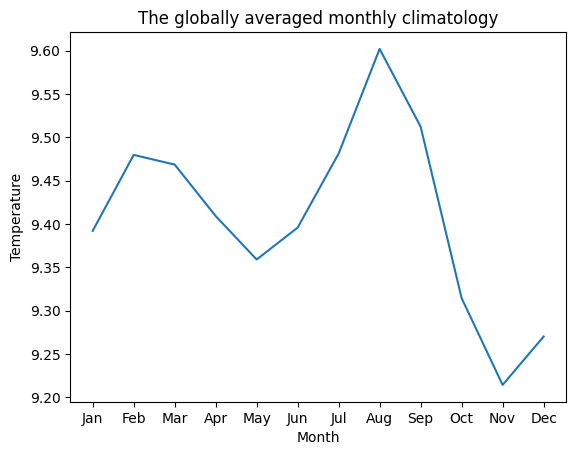

In [57]:
# Combine the monthly averages into a 2D array
temperature_data = np.array([jan_avg_1, feb_avg_1, mar_avg_1, apr_avg_1, may_avg_1, jun_avg_1, jul_avg_1, aug_avg_1, sep_avg_1, oct_avg_1, nov_avg_1, dec_avg_1])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a heatmap with months on the x-axis
plt.plot(months, temperature_data)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('The globally averaged monthly climatology')

plt.show()

#### SAT

In [58]:
jan_avg = np.mean(jan_mc)
feb_avg = np.mean(feb_mc)
mar_avg = np.mean(mar_mc)
apr_avg = np.mean(apr_mc)
may_avg = np.mean(may_mc)
jun_avg = np.mean(jun_mc)
jul_avg = np.mean(jul_mc)
aug_avg = np.mean(aug_mc)
sep_avg = np.mean(sep_mc)
oct_avg = np.mean(oct_mc)
nov_avg = np.mean(nov_mc)
dec_avg = np.mean(dec_mc)

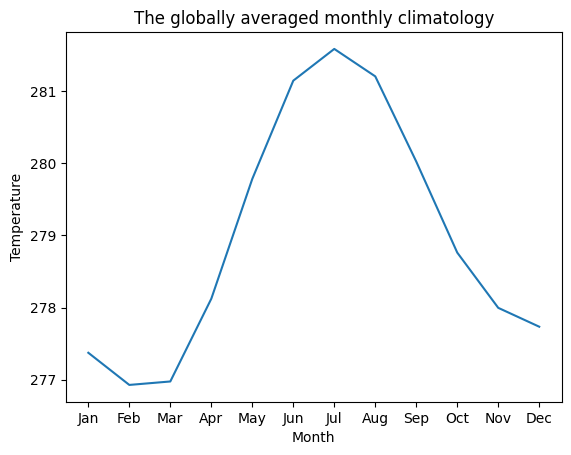

In [59]:
# Combine the monthly averages into a 2D array
temperature_data = np.array([jan_avg, feb_avg, mar_avg, apr_avg, may_avg, jun_avg, jul_avg, aug_avg, sep_avg, oct_avg, nov_avg, dec_avg])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a heatmap with months on the x-axis
plt.plot(months, temperature_data)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('The globally averaged monthly climatology')

plt.show()

## 3. b. The spatial plot of the climatological months i.e. jan, feb, march….


#### SST

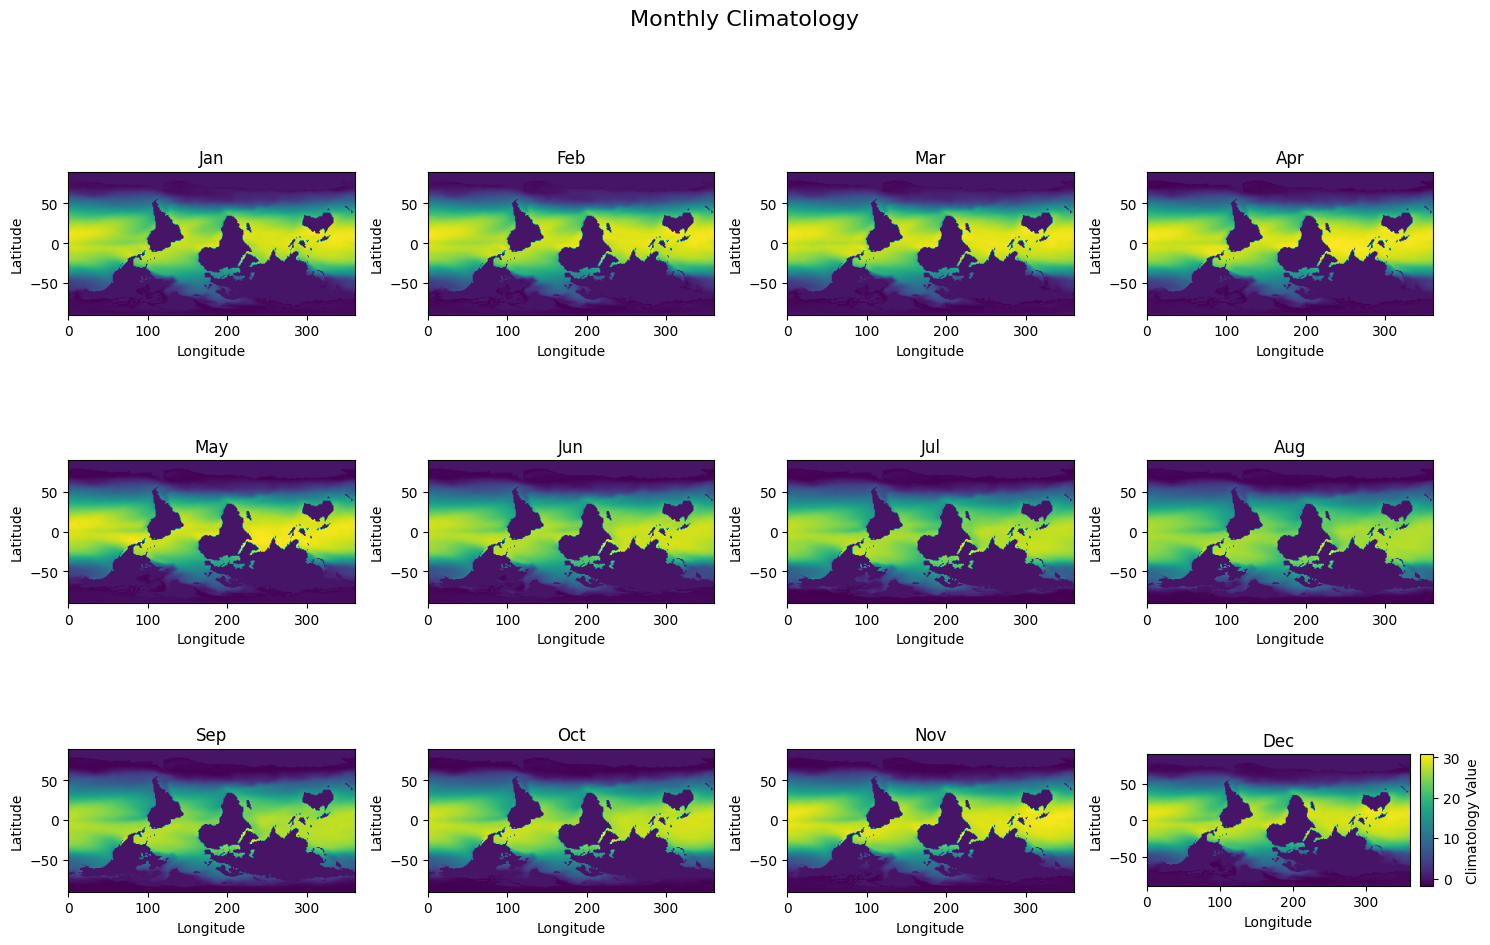

In [60]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Combine the monthly climatology arrays into a single 3D array
climatology_data = np.array([jan_mc_1, feb_mc_1, mar_mc_1, apr_mc_1, may_mc_1, jun_mc_1, jul_mc_1, aug_mc_1, sep_mc_1, oct_mc_1, nov_mc_1, dec_mc_1])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Monthly Climatology', fontsize=16)

for i, ax in enumerate(axes.flat):
    month_data = climatology_data[i, :, :]
    im = ax.imshow(month_data, cmap='viridis', origin='upper', extent=[0, 360, -90, 90])

    ax.set_title(months[i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(axes[-1, -1])
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Climatology Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

#### SAT

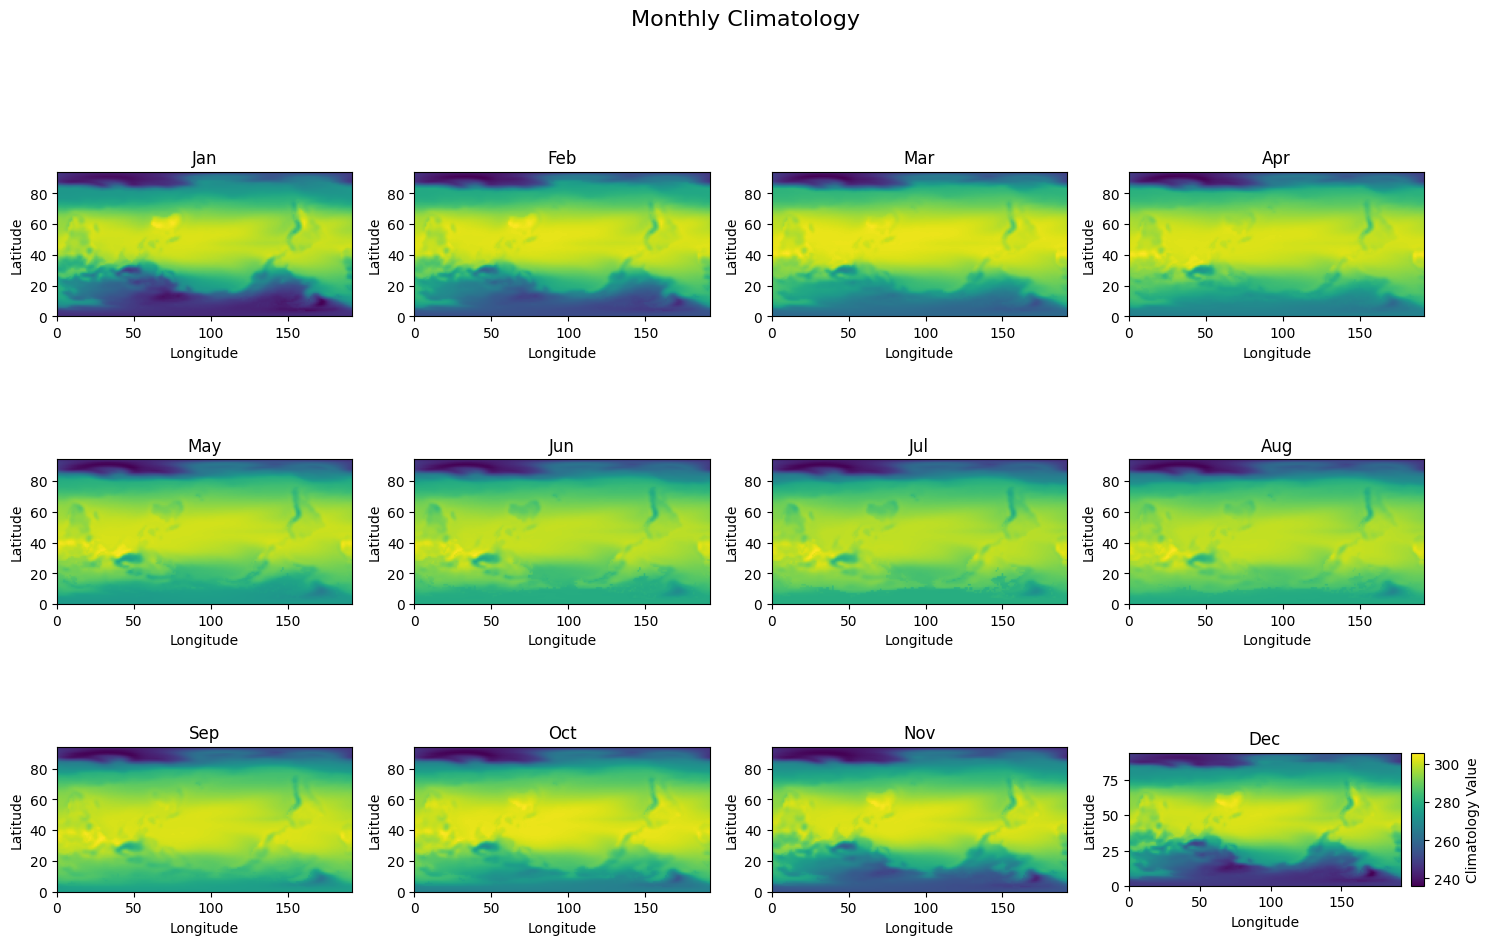

In [61]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Combine the monthly climatology arrays into a single 3D array
climatology_data = np.array([jan_mc, feb_mc, mar_mc, apr_mc, may_mc, jun_mc, jul_mc, aug_mc, sep_mc, oct_mc, nov_mc, dec_mc])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Monthly Climatology', fontsize=16)

for i, ax in enumerate(axes.flat):
    month_data = climatology_data[i, :, :]
    im = ax.imshow(month_data, cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

    ax.set_title(months[i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(axes[-1, -1])
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Climatology Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

## 3. c. The globally averaged monthly anomaly time series


#### SST

In [62]:
jan_avg_1 = np.mean(jan_ma_1)
feb_avg_1 = np.mean(feb_ma_1)
mar_avg_1 = np.mean(mar_ma_1)
apr_avg_1 = np.mean(apr_ma_1)
may_avg_1 = np.mean(may_ma_1)
jun_avg_1 = np.mean(jun_ma_1)
jul_avg_1 = np.mean(jul_ma_1)
aug_avg_1 = np.mean(aug_ma_1)
sep_avg_1 = np.mean(sep_ma_1)
oct_avg_1 = np.mean(oct_ma_1)
nov_avg_1 = np.mean(nov_ma_1)
dec_avg_1 = np.mean(dec_ma_1)

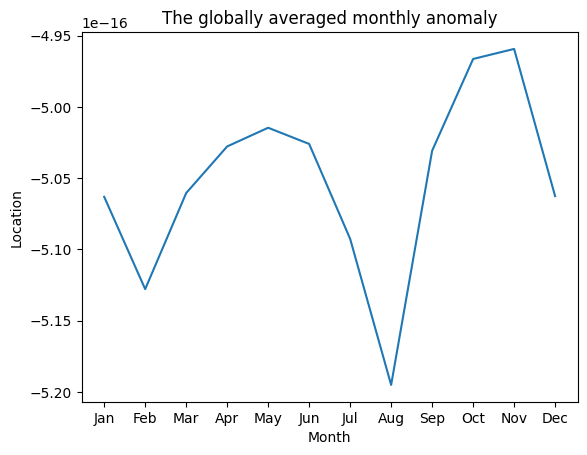

In [63]:
import matplotlib.pyplot as plt

# Combine the monthly averages into a 2D array
temperature_data = np.array([jan_avg_1, feb_avg_1, mar_avg_1, apr_avg_1, may_avg_1, jun_avg_1, jul_avg_1, aug_avg_1, sep_avg_1, oct_avg_1, nov_avg_1, dec_avg_1])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a heatmap with months on the x-axis
plt.plot(months, temperature_data)

plt.xlabel('Month')
plt.ylabel('Location')
plt.title('The globally averaged monthly anomaly')

plt.show()

#### SAT

In [64]:
jan_avg = np.mean(jan_ma)
feb_avg = np.mean(feb_ma)
mar_avg = np.mean(mar_ma)
apr_avg = np.mean(apr_ma)
may_avg = np.mean(may_ma)
jun_avg = np.mean(jun_ma)
jul_avg = np.mean(jul_ma)
aug_avg = np.mean(aug_ma)
sep_avg = np.mean(sep_ma)
oct_avg = np.mean(oct_ma)
nov_avg = np.mean(nov_ma)
dec_avg = np.mean(dec_ma)

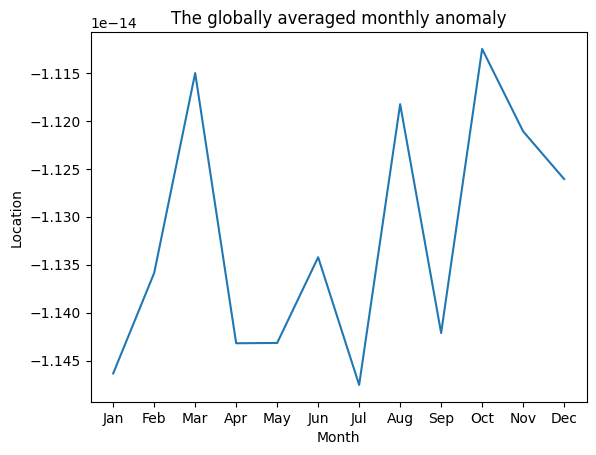

In [65]:
# Combine the monthly averages into a 2D array
temperature_data = np.array([jan_avg, feb_avg, mar_avg, apr_avg, may_avg, jun_avg, jul_avg, aug_avg, sep_avg, oct_avg, nov_avg, dec_avg])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a heatmap with months on the x-axis
plt.plot(months, temperature_data)

plt.xlabel('Month')
plt.ylabel('Location')
plt.title('The globally averaged monthly anomaly')

plt.show()

### 3. d. The spatial plot of the months of January from the monthly anomaly for the years
1998, 2016, 2011, 2008

#### SST

###### 1998

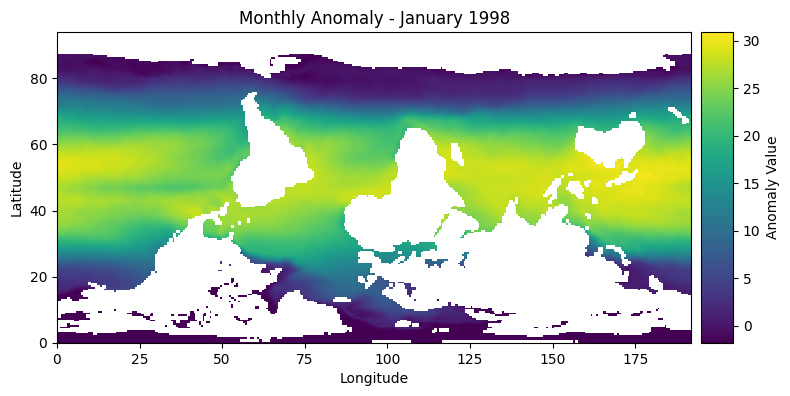

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming climatology_data is a 2D array
climatology_data = np.array([temp[228]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 1998')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


###### 2008

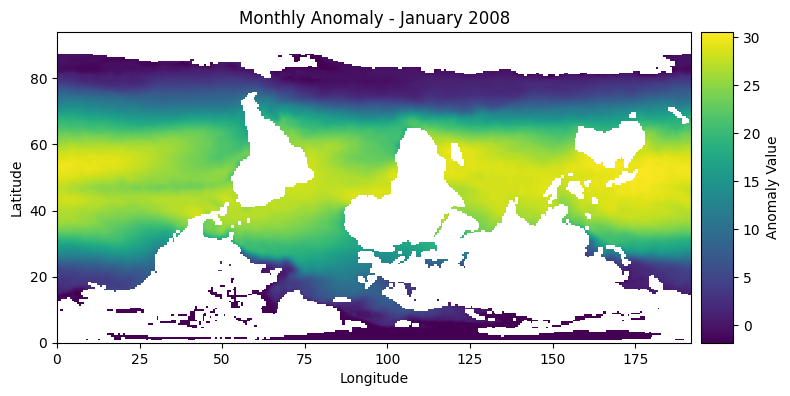

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming climatology_data is a 2D array
climatology_data = np.array([temp[336]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 2008')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


###### 2011

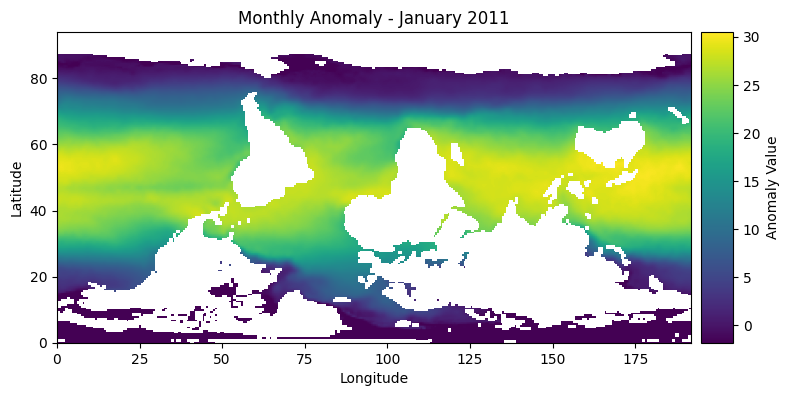

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming climatology_data is a 2D array
climatology_data = np.array([temp[372]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 2011')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


###### 2016

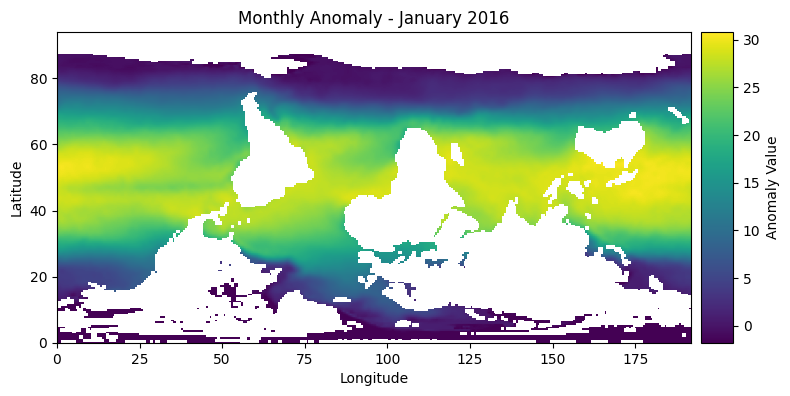

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming climatology_data is a 2D array
climatology_data = np.array([temp[432]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 2016')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


#### SAT

###### 1998

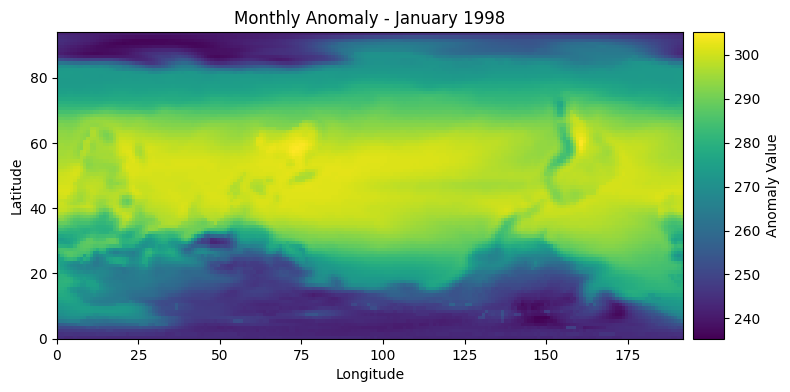

In [70]:
# Assuming climatology_data is a 2D array
climatology_data = np.array([air_temperature[228]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 1998')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

###### 2008

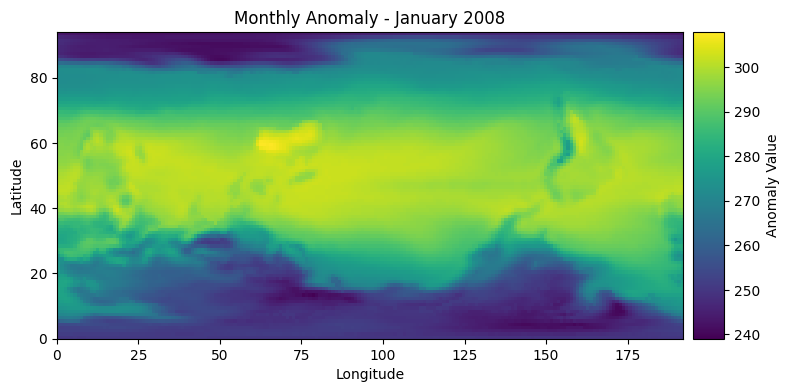

In [71]:
# Assuming climatology_data is a 2D array
climatology_data = np.array([air_temperature[336]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 2008')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

###### 2011

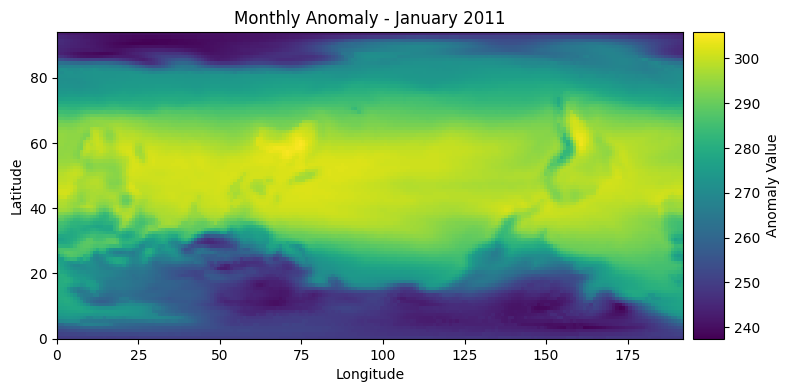

In [72]:
# Assuming climatology_data is a 2D array
climatology_data = np.array([air_temperature[372]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 2011')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

###### 2016

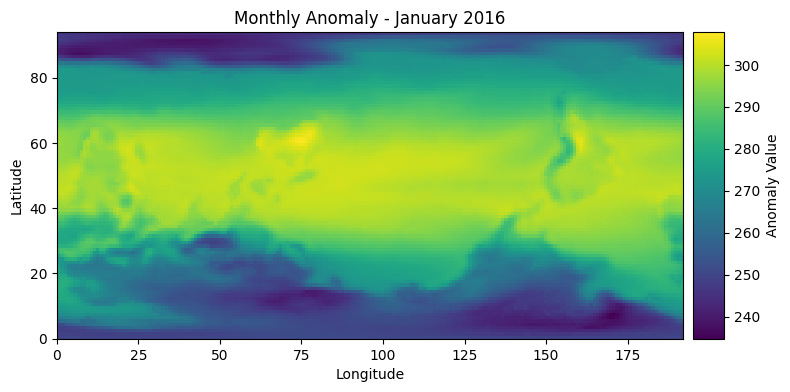

In [73]:
# Assuming climatology_data is a 2D array
climatology_data = np.array([air_temperature[432]])

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Monthly Anomaly - January 2016')

# Create an imshow plot for the climatology data
im = ax.imshow(climatology_data[0, :, :], cmap='viridis', origin='upper', extent=[0, 192, 0, 94])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Use make_axes_locatable to create an axes divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Anomaly Value')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

### 3. e. Compute the linear trend (i.e. the rate or the regression against time) for the globally 
averaged monthly time series of anomaly.

#### SST

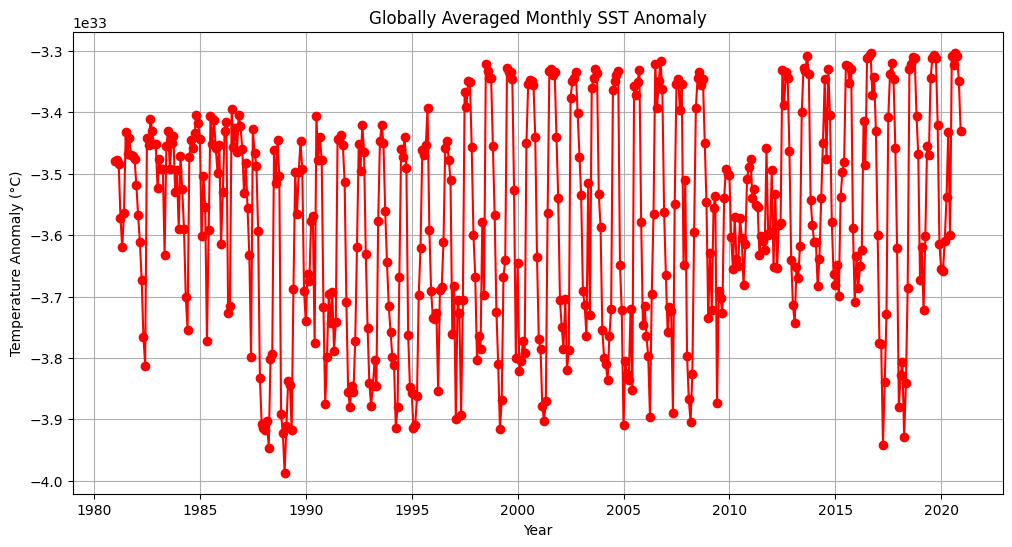

Linear Trend: 1818012809662075744761180848128.0000 °C/year
R-squared: 0.0141


In [74]:
# Open the NetCDF file for input
input_filepath = 'sst.nc'  # Replace with your actual input file path
dataset = nc.Dataset(input_filepath, 'r')

# Extract variables
time_variable = dataset.variables['TIME']
latitude_variable = dataset.variables['LATITUDE']  # Update to LATITUDE
longitude_variable = dataset.variables['LONGITUDE']  # Update to LONGITUDE
sst_variable = dataset.variables['SST1']  # Update to your sea surface temperature variable

# Convert time values to datetime objects
time_values = time_variable[:]
time_units = time_variable.units
# Check if 'calendar' attribute exists, if not, use a default value
time_calendar = getattr(time_variable, 'calendar', 'standard')
time_datetime = nc.num2date(time_values, units=time_units, calendar=time_calendar)

# Get sea surface temperature (SST) data
sst_data = sst_variable[:]

# Calculate monthly climatology
monthly_climatology = []
for month in range(1, 13):
    month_mask = np.array([t.month == month for t in time_datetime])
    sst_monthly = sst_data[month_mask, :, :]
    monthly_mean = np.nanmean(sst_monthly, axis=0)
    monthly_climatology.append(monthly_mean)

# Calculate the anomaly for each month
monthly_anomalies = []
for i in range(len(time_datetime)):
    month = time_datetime[i].month
    anomaly = sst_data[i, :, :] - monthly_climatology[month - 1]
    monthly_anomalies.append(anomaly)

# Save the anomalies to a new NetCDF file
anomaly_output_filepath = 'anomaly.nc'  # Replace with your desired output file path
anomaly_output_dataset = nc.Dataset(anomaly_output_filepath, 'w', format='NETCDF4')
time_dim = anomaly_output_dataset.createDimension('TIME', len(time_datetime))
lat_dim = anomaly_output_dataset.createDimension('LAT', len(latitude_variable))
lon_dim = anomaly_output_dataset.createDimension('LON', len(longitude_variable))
anomaly_var = anomaly_output_dataset.createVariable('SST1', 'f4', ('TIME', 'LAT', 'LON',))  # Update to SST_ANOMALY
time_var = anomaly_output_dataset.createVariable('TIME', 'f8', ('TIME',))
lat_var = anomaly_output_dataset.createVariable('LAT', 'f4', ('LAT',))
lon_var = anomaly_output_dataset.createVariable('LON', 'f4', ('LON',))
anomaly_var[:] = np.array(monthly_anomalies)
time_var[:] = time_values
lat_var[:] = latitude_variable[:]
lon_var[:] = longitude_variable[:]
anomaly_var.units = '°C'
time_var.units = time_units
time_var.calendar = time_calendar
lat_var.units = 'degrees_north'
lat_var.long_name = 'latitude'
lon_var.units = 'degrees_east'
lon_var.long_name = 'longitude'
anomaly_var.long_name = 'Monthly SST Anomaly'  # Update to Monthly SST Anomaly
anomaly_output_dataset.close()

# Compute and plot the linear trend of globally averaged monthly SST anomaly
global_monthly_avg_anomaly = np.nanmean(np.nanmean(monthly_anomalies, axis=2), axis=1)
time_in_years = np.array([date.year + (date.month-1)/12 for date in time_datetime])
slope, intercept, r_value, p_value, std_err = linregress(time_in_years, global_monthly_avg_anomaly)

plt.figure(figsize=(12, 6))
plt.plot(time_in_years, global_monthly_avg_anomaly, marker='o', linestyle='-', color="red")
plt.title('Globally Averaged Monthly SST Anomaly')  # Update to SST Anomaly
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

print(f'Linear Trend: {slope:.4f} °C/year')
print(f'R-squared: {r_value**2:.4f}')

# Close the input dataset
dataset.close()


#### SAT

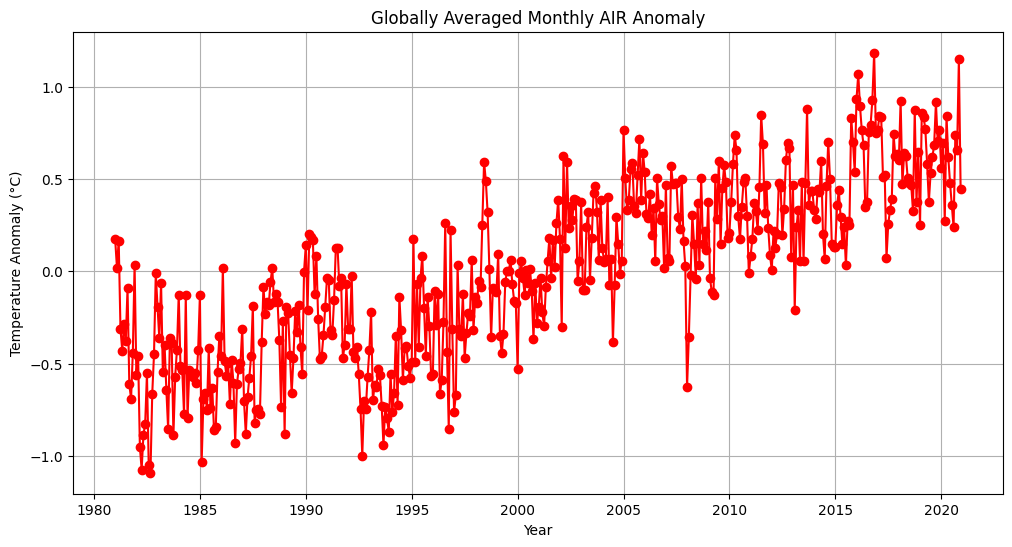

Linear Trend: 0.0331 °C/year
R-squared: 0.6502


In [75]:
# Open the NetCDF file for input
input_filepath = 'sat.nc' # Replace with your actual input file path
dataset = nc.Dataset(input_filepath, 'r')

# Extract variables
time_variable = dataset.variables['TIME']
latitude_variable = dataset.variables['LAT']
longitude_variable = dataset.variables['LON']
air_variable = dataset.variables['AIR']  # Variable for surface air temperature

# Convert time values to datetime objects
time_values = time_variable[:]
time_units = time_variable.units
# Check if 'calendar' attribute exists, if not, use a default value
time_calendar = getattr(time_variable, 'calendar', 'standard')
time_datetime = nc.num2date(time_values, units=time_units, calendar=time_calendar)

# Get AIR data
air_data = air_variable[:]

# Calculate monthly climatology
monthly_climatology = []
for month in range(1, 13):
    month_mask = np.array([t.month == month for t in time_datetime])
    air_monthly = air_data[month_mask, :, :]
    monthly_mean = np.nanmean(air_monthly, axis=0)
    monthly_climatology.append(monthly_mean)

# Calculate the anomaly for each month
monthly_anomalies = []
for i in range(len(time_datetime)):
    month = time_datetime[i].month
    anomaly = air_data[i, :, :] - monthly_climatology[month - 1]
    monthly_anomalies.append(anomaly)

# Save the anomalies to a new NetCDF file
anomaly_output_filepath = 'backup.nc'  # Replace with your desired output file path
anomaly_output_dataset = nc.Dataset(anomaly_output_filepath, 'w', format='NETCDF4')
time_dim = anomaly_output_dataset.createDimension('TIME', len(time_datetime))
lat_dim = anomaly_output_dataset.createDimension('LAT', len(latitude_variable))
lon_dim = anomaly_output_dataset.createDimension('LON', len(longitude_variable))
anomaly_var = anomaly_output_dataset.createVariable('AIR_ANOMALY', 'f4', ('TIME', 'LAT', 'LON',))
time_var = anomaly_output_dataset.createVariable('TIME', 'f8', ('TIME',))
lat_var = anomaly_output_dataset.createVariable('LAT', 'f4', ('LAT',))
lon_var = anomaly_output_dataset.createVariable('LON', 'f4', ('LON',))
anomaly_var[:] = np.array(monthly_anomalies)
time_var[:] = time_values
lat_var[:] = latitude_variable[:]
lon_var[:] = longitude_variable[:]
anomaly_var.units = '°C'
time_var.units = time_units
time_var.calendar = time_calendar
lat_var.units = 'degrees_north'
lat_var.long_name = 'latitude'
lon_var.units = 'degrees_east'
lon_var.long_name = 'longitude'
anomaly_var.long_name = 'Monthly AIR Anomaly'
anomaly_output_dataset.close()

# Compute and plot the linear trend of globally averaged monthly SAT anomaly
global_monthly_avg_anomaly = np.nanmean(np.nanmean(monthly_anomalies, axis=2), axis=1)
time_in_years = np.array([date.year + (date.month-1)/12 for date in time_datetime])
slope, intercept, r_value, p_value, std_err = linregress(time_in_years, global_monthly_avg_anomaly)

plt.figure(figsize=(12, 6))
plt.plot(time_in_years, global_monthly_avg_anomaly, marker='o', linestyle='-', color='red')
plt.title('Globally Averaged Monthly AIR Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

print(f'Linear Trend: {slope:.4f} °C/year')
print(f'R-squared: {r_value**2:.4f}')

# Close the input dataset
dataset.close()

### Compute the correlation co-efficient between the time series of globally averaged monthly anomaly from surface air temperature and sea surface temperature.

In [76]:
# Assuming 'ds_sst' and 'ds_air' are your xarray datasets
# Extract the relevant variables
sst_data = np.array([np.mean(eval(f'{month}_ma_1')) for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
  # Replace 'SST1' with the actual variable name
air_data = np.array([np.mean(eval(f'{month}_ma')) for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]) # Replace 'AIR' with the actual variable name

# Assuming 'TIME' is the common dimension
time_points = ds_1['TIME'].values  # Assuming 'TIME' is the common dimension
# print(time_points)

# Calculate correlation coefficient for each pair of corresponding time points
correlation_coefficient, _ = pearsonr(sst_data, air_data)

print(f"Correlation coefficient: {correlation_coefficient}")


Correlation coefficient: 0.06771418287465934


# 4. Write a 200 words report on the above analysis.

./report.md